In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import interpolate
from COVID import *
import sys
sys.path.append("..")
sys.path.append('../Viterbi')
from SlidingWindow import *
from Viterbi import getCSM

In [2]:
#https://www.worldometers.info/world-population/us-population/
#https://www.macrotrends.net/countries/ITA/italy/population-growth-rate#:~:text=The%20current%20population%20of%20Italy,a%200.02%25%20increase%20from%202016.
#https://www.worldometers.info/world-population/japan-population/
#https://www.worldometers.info/world-population/kazakhstan-population/
#https://www.worldometers.info/world-population/spain-population/

In [8]:
#covid data from january 20th to july 10th 2020
USCode = "US"
USPop = 329064917
JPCode = "JP"
JPPop = 126476461
ITCode = "IT"
ITPop = 60550075
KZCode = "KZ"
KZPop = 18784556
ESCode = "ES"
ESPop = 46755639


#Audio length to interpolate to 
fs = 44100
seconds = 15
DesiredAudioFrame = np.linspace(0, seconds, int(fs*seconds))

#creates chords to be used for amplitude modulation
Types = ["MajorW","Major7","Major","Minor7","Dim","Aug","Minor","FullyDim","Tri"]
freq = 440
Chords = make_chord_arrays(seconds,Types,freq)
rcsize = int(np.sqrt(len(Types)))

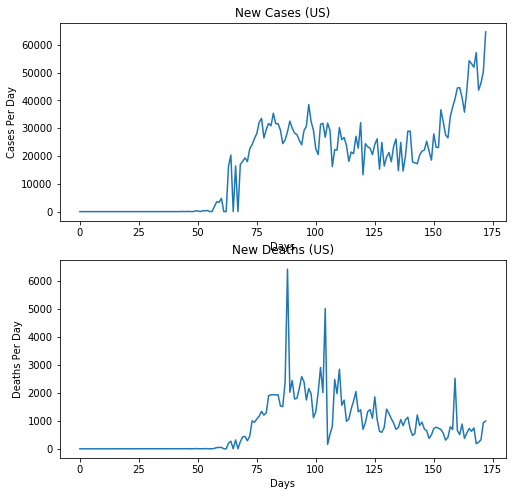

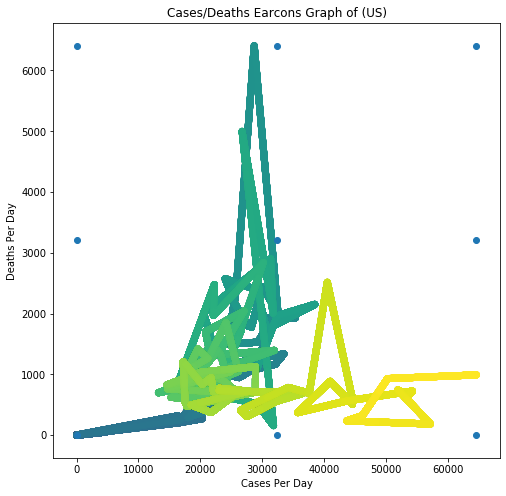

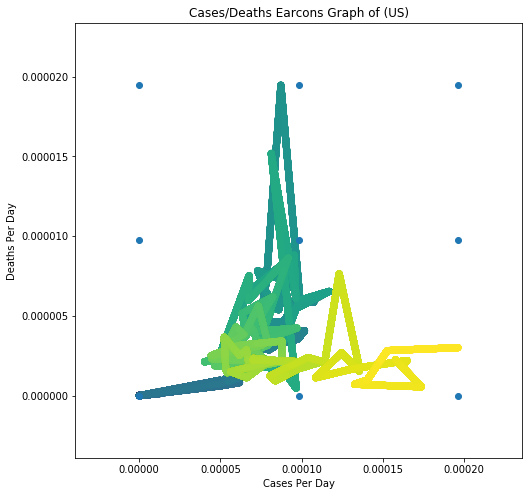

In [4]:
USAudio = do_covid_calc(USCode,DesiredAudioFrame,Chords,rcsize,USPop)

In [5]:
ipd.Audio(USAudio, rate=fs)

In [ ]:
JPAudio = do_covid_calc(JPCode,DesiredAudioFrame,Chords,rcsize,JPPop)

In [ ]:
ipd.Audio(JPAudio, rate=fs)

In [ ]:
ITAudio = do_covid_calc(ITCode,DesiredAudioFrame,Chords,rcsize,ITPop)

In [ ]:
ipd.Audio(ITAudio, rate=fs)

In [ ]:
KZAudio = do_covid_calc(KZCode,DesiredAudioFrame,Chords,rcsize,KZPop)

In [ ]:
ipd.Audio(KZAudio, rate=fs)

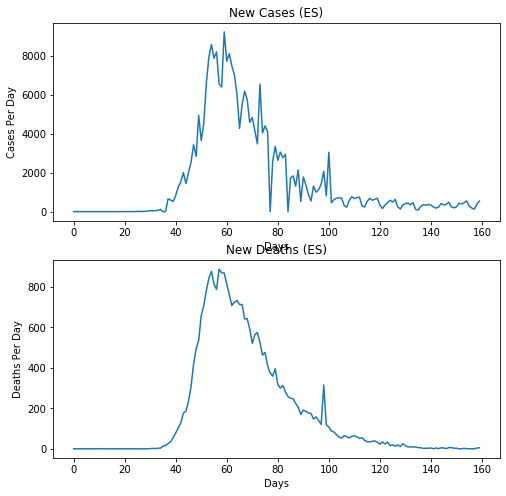

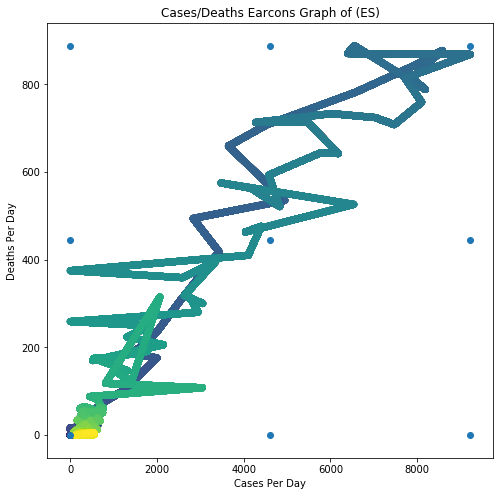

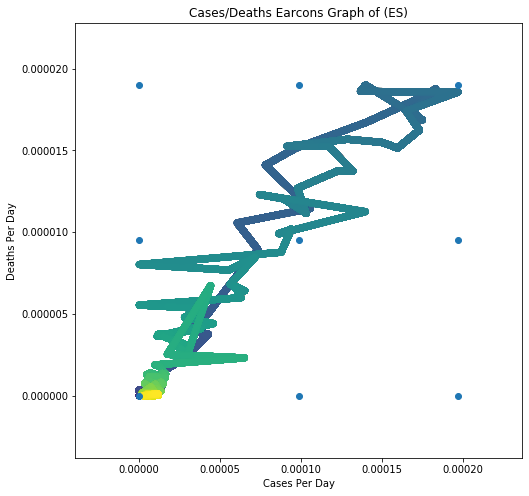

In [9]:
ESAudio = do_covid_calc(ESCode,DesiredAudioFrame,Chords,rcsize,ESPop)

In [10]:
ipd.Audio(ESAudio, rate=fs)